# Exploration of Replication Data for: A Field Experiment on Workplace Norms and Electric Vehicle Charging Etiquette

This dataset contains information from 3,395 high resolution electric vehicle charging sessions. The data contains sessions from 85 EV drivers with repeat usage at 105 stations across 25 sites at a workplace charging program. The workplace locations include facilities such as research and innovation centers, manufacturing, testing facilities and office headquarters for a firm participating in the U.S. Department of Energy (DOE) workplace charging challenge. The data is in a human and machine readable *.CSV format. The resolution of the data is to the nearest second, which is the same resolution as used in the analysis of the paper. It is directly importable into free software. (2020-07-30 from [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NFPQLW))

We will roughly explore the dataset and then dive into several questions that might be arised when exlopration.

## EDA of Electric Vehicle Charging


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv('data/station_data_dataverse.csv')
pd.set_option('display.max_columns', None)


**Top/Last five rows of the dataset**




In [3]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,NaN,35897499,582873,461655,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,NaN,35897499,549414,461655,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,NaN,35897499,129465,461655,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,NaN,35897499,569889,461655,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,NaN,35897499,414088,566549,0,3,0,0,0,1,0,0,0,0


In [4]:
df.tail()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
3390,7021565,6.74,0.0,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,13.352643,59574735,884707,648339,0,2,0,0,0,1,0,0,0,1
3391,3758092,6.86,0.0,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,13.352643,59574735,884707,648339,0,2,0,0,0,0,1,0,0,1
3392,5858374,6.07,0.0,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,2.337085,32070852,638536,868085,0,3,0,0,1,0,0,0,0,1
3393,2586645,5.74,0.0,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,4.671064,58023207,818217,700367,1,2,0,0,0,1,0,0,0,1
3394,7860608,6.95,0.0,0015-10-01 16:43:05,0015-10-01 19:42:06,16,19,2.983611,Thu,ios,3.308334,26098875,664306,868085,0,3,0,0,0,1,0,0,0,1


**Finding out the number of null values**

In [5]:
df.isnull().sum()


sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64

**Descriptive Statistics of the dataset**

In [6]:
df.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [7]:
df[['kwhTotal', 'dollars', 'startTime',
       'endTime', 'chargeTimeHrs', 'distance', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip']].describe()


,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378,0.595582,2.428571,0.181443,0.187040,0.210015,0.216495,0.179676,0.018262,0.007069,0.703976
std,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571,0.490851,0.811204,0.385442,0.390001,0.407379,0.411916,0.383974,0.133918,0.083793,0.456569
min,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.reportedZip.unique()

array([0, 1])

**Conclusion of exploration:**  

The datasets contains 24 columns with 3395 rows. In details:

*   'kwhTotal', 'dollars', 'distance'  represent the amount, price and miles of the charge.

* 'created', 'ended' are created and ended are datetime stamps (00YY-MM-DD HH:MM:SS), which might need to be transfered to YYYY-MM-DD HH:MM:SS. 'startTime', 'endTime', 'chargeTimeHrs' are the fine-grained information of charging hours.
* 'weekday',  'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun' are the day of the week and has been splited into dummy variables.

* 'platform' implies the platform that users used for charging.

*   'sessionId', 'userId','stationId', 'locationId' should all be unique ids represents the index of the transaction, user, charging station and charging location.

*  'facilityType' is the type of facility a station is installed at (manufacturing = 1, office = 2, research and development = 3, other = 4).

* 'managerVehicle', 'reportedZip' seem like do not have clear explanation and information that could contribute to the model, but we will see it later.



Based on the exploration, we will discuss several questions that are related to the EDA.



In [9]:
def fix_year(date_str):
    try:
        # Split the date string and check the year
        date_parts = date_str.split('-')
        if date_parts[0] == '0014':
            date_parts[0] = '2014'
        elif date_parts[0] == '0015':
            date_parts[0] = '2015'
        return '-'.join(date_parts)
    except Exception as e:
        # Handle exceptions if date_str is not a proper date string
        return np.nan

df['created'] = df['created'].apply(fix_year)
df['created'] = pd.to_datetime(df['created'], errors='coerce')

df['ended'] = df['ended'].apply(fix_year)
df['ended'] = pd.to_datetime(df['ended'], errors='coerce')


## **Qestions: 1. The relation of energy usage, price and charging time?**

```
# This is formatted as code
```



In [10]:
df_usage = df[['kwhTotal', 'dollars', 'distance', 'created', 'ended','chargeTimeHrs','userId',
       'stationId', 'locationId' ]]


In [11]:
df_sorted = df_usage.sort_values(by=['created'])


### **1.1 What is the total energy usage**

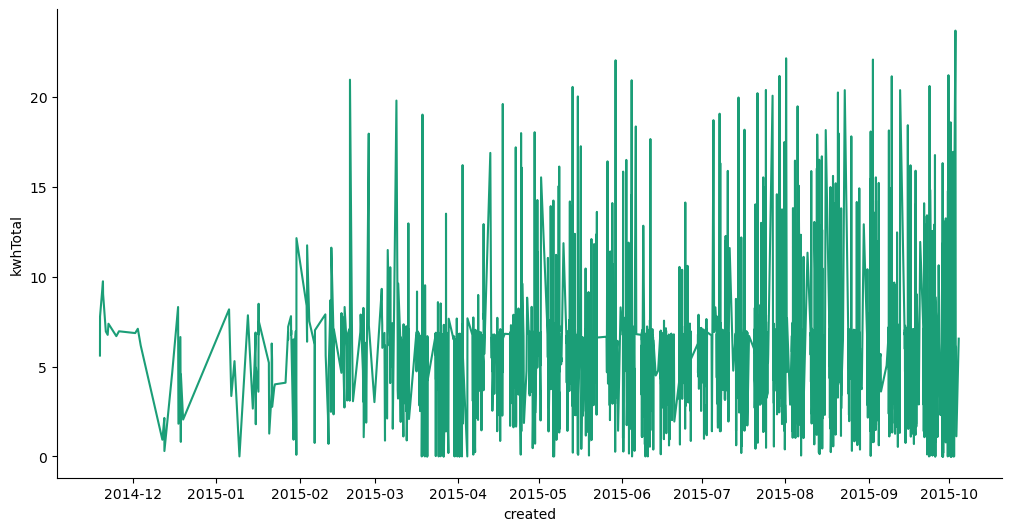

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_energy(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['created']
  ys = series['kwhTotal']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_energy(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('created')
_ = plt.ylabel('kwhTotal')

From the figure, we can see there are several sessions are with 0 kwh charged. However, as the purpose of EDA, they are expected to be non-zero charges. We will have further analysis for this discover.



In [13]:
df_sorted.query("kwhTotal>0")[['kwhTotal', 'dollars','distance','chargeTimeHrs']].describe()


,kwhTotal,dollars,distance,chargeTimeHrs
count,3340.000000,3340.000000,2330.000000,3340.000000
mean,5.905296,0.119416,18.652378,2.880775
std,2.817906,0.494405,11.420571,1.480298
min,0.010000,0.000000,0.856911,0.021111
25%,4.470000,0.000000,5.135871,2.144931
50%,6.280000,0.000000,21.023826,2.826667
75%,6.840000,0.000000,27.285053,3.561597
max,23.680000,7.500000,43.059292,55.238056


In [14]:
df_zero_charged = df.query("kwhTotal==0")
df_zero_charged[['kwhTotal', 'dollars','distance','chargeTimeHrs']].describe()


,kwhTotal,dollars,distance,chargeTimeHrs
count,55.0,55.000000,0.0,55.000000
mean,0.0,0.048545,NaN,0.455667
std,0.0,0.360023,NaN,1.200754
min,0.0,0.000000,NaN,0.012500
25%,0.0,0.000000,NaN,0.019583
50%,0.0,0.000000,NaN,0.023611
75%,0.0,0.000000,NaN,0.028889
max,0.0,2.670000,NaN,6.718611


### Summary Statistics Analysis
1. **Count**: There are 55 instances where `kwhTotal` is 0.
2. **Mean**: The mean value of `kwhTotal` is 0, as expected since all values are zero. The average value of `dollars` is approximately 0.0485, suggesting minimal charges associated with these instances. The mean `chargeTimeHrs` is around 0.456 hours.
3. **Standard Deviation (std)**: The standard deviation for `kwhTotal` is 0 because all values are zero. The standard deviation for `dollars` is 0.360, indicating some variation in the associated costs even when no energy was consumed. The standard deviation for `chargeTimeHrs` is 1.201, showing that the time spent charging can vary significantly.
4. **Minimum and Maximum Values**:
   - `kwhTotal`: Consistently 0.
   - `dollars`: Ranges from 0 to 2.67. This implies that there can be a cost associated with the charging session even when no energy is consumed, possibly due to fees or other charges.
   - `chargeTimeHrs`: Ranges from 0.0125 to 6.719 hours. This suggests that vehicles can be plugged in for varying durations without drawing power.

### Potential Explanations and Further Analysis
1. **Idle Time or Inactive Sessions**: The data indicates that `kwhTotal` is 0 while `chargeTimeHrs` is non-zero. This could mean that the vehicle was plugged in but not actively charging, possibly due to technical issues or because the vehicle was fully charged but remained connected.
2. **Charging Fees Without Consumption**: The presence of non-zero `dollars` values suggests that some sessions might incur a fee even when no electricity is consumed. Investigating the billing structure can provide insights into whether these fees are due to reservation costs, parking fees, or other factors.
3. **Investigate Missing Data**: The distance data is missing (`NaN`), indicating that for these instances, the system did not record the distance traveled. This might need further investigation to understand if this is a systematic issue or an anomaly.


### Summary

Hence, we will drop all the rows with `kwhTotal` are zero since it implied the unactively charging which might due to technical issues.



In [15]:
df_non_zero = df_sorted.drop(df_sorted[df_sorted['kwhTotal'] == 0].index)
df_non_zero[['kwhTotal', 'dollars','distance','chargeTimeHrs']].describe()

,kwhTotal,dollars,distance,chargeTimeHrs
count,3340.000000,3340.000000,2330.000000,3340.000000
mean,5.905296,0.119416,18.652378,2.880775
std,2.817906,0.494405,11.420571,1.480298
min,0.010000,0.000000,0.856911,0.021111
25%,4.470000,0.000000,5.135871,2.144931
50%,6.280000,0.000000,21.023826,2.826667
75%,6.840000,0.000000,27.285053,3.561597
max,23.680000,7.500000,43.059292,55.238056


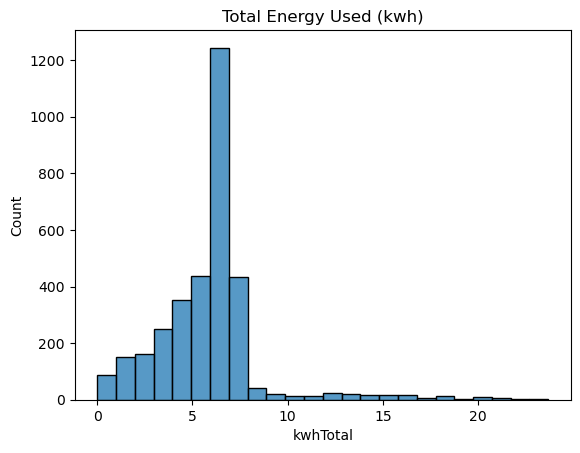

In [16]:
sns.histplot(df_non_zero.kwhTotal, binwidth=1).set(title="Total Energy Used (kwh)");


From the figure, we can see the common energy consumed is from 5-7 kwhs, with most of the users charged their vehicles less than 7 kwhs.

### **1.2 What is the total amount of dollars**

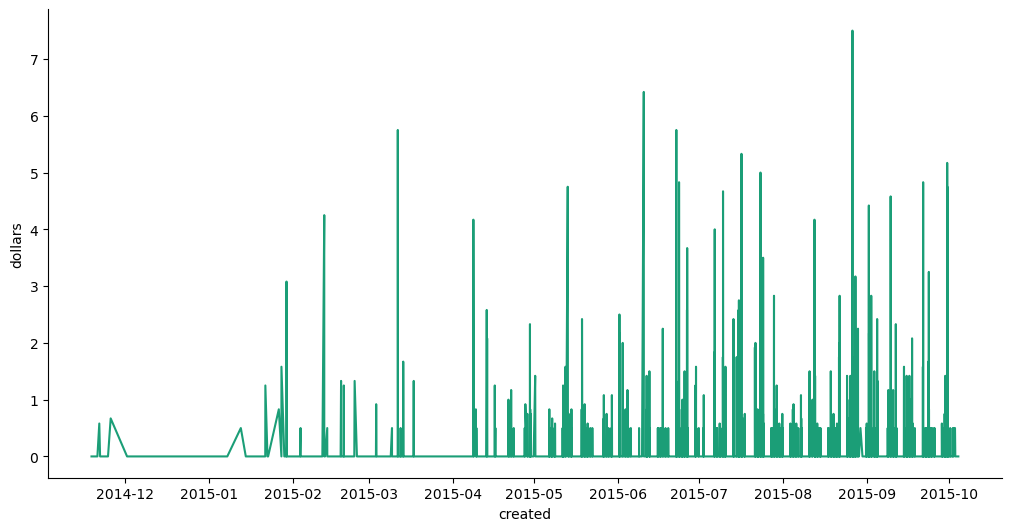

In [17]:
def _plot_dollars(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['created']
  ys = series['dollars']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = _df_25.sort_values('created', ascending=True)
_plot_dollars(df_non_zero, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('created')
_ = plt.ylabel('dollars')

Since we can see the most of the sessions are paid free.


In [18]:
# add a new categoric variable, free, for sessions with zero dollars
df_non_zero[df_non_zero['dollars'] == 0][['kwhTotal', 'dollars','distance','chargeTimeHrs']].describe()


,kwhTotal,dollars,distance,chargeTimeHrs
count,2962.000000,2962.0,2110.000000,2962.000000
mean,5.806928,0.0,18.531214,2.605641
std,2.792328,0.0,11.449812,0.883221
min,0.010000,0.0,0.856911,0.021111
25%,4.332500,0.0,5.135871,2.066111
50%,6.170000,0.0,21.023826,2.691806
75%,6.830000,0.0,27.096147,3.297847
max,22.140000,0.0,43.059292,3.998611


In [19]:
free_session = df_non_zero[df_non_zero['dollars'] == 0]['dollars'].count()/ df_non_zero['dollars'].count()
print(f"Percentage of free sessions: {free_session:.2f}%")


Percentage of free sessions: 0.89%


In [20]:
df_non_zero[df_non_zero['dollars'] != 0][['kwhTotal', 'dollars','distance','chargeTimeHrs']].describe()


,kwhTotal,dollars,distance,chargeTimeHrs
count,378.000000,378.000000,220.000000,378.000000
mean,6.676111,1.055159,19.814449,5.036723
std,2.901197,1.083945,11.094447,2.832956
min,0.210000,0.500000,0.856911,4.000278
25%,5.782500,0.500000,5.706316,4.177500
50%,6.660000,0.500000,23.542360,4.511806
75%,6.920000,1.170000,28.616713,5.201458
max,23.680000,7.500000,43.059292,55.238056




### **Free Sessions**
1. **Count**: There are 2,962 free sessions, indicating a large portion of the dataset consists of free sessions.
2. **dollars**: The `dollars` value is 0 for all free sessions.
3. **kwhTotal**: The average `kwhTotal` is 5.81, which is relatively lower than in non-free sessions. The maximum value is 22.14, which is similar to the maximum in non-free sessions.
4. **distance**: The mean distance is 18.53, which is slightly lower compared to non-free sessions. The distance ranges from 0.86 to 43.06.
5. **chargeTimeHrs**: The average charge time is 2.61 hours, which is significantly lower than the 5.04 hours for non-free sessions.

### **Non-Free Sessions**
1. **Count**: There are 378 non-free sessions.
2. **dollars**: The `dollars` value ranges from 0.50 to 7.50, with a mean of 1.06. This indicates that non-free sessions involve a monetary charge.
3. **kwhTotal**: The average `kwhTotal` is 6.68, which is higher compared to the free sessions. The maximum is 23.68.
4. **distance**: The mean distance is 19.81, which is slightly higher than in free sessions. The distance ranges from 0.86 to 43.06, similar to the range in free sessions.
5. **chargeTimeHrs**: The average charge time is 5.04 hours, which is notably higher than the free sessions. The range is from 4.00 to 55.24 hours.

### **Comparative Analysis**
1. **Cost Association**: Free sessions have a `dollars` value of 0, while non-free sessions have a mean `dollars` value of 1.06, suggesting that the free sessions do not involve any monetary charge, whereas non-free sessions do.
   
2. **Energy Consumption**: The average `kwhTotal` is higher in non-free sessions, indicating that paid sessions might involve higher energy usage.

3. **Distance**: The distance covered in both types of sessions is quite similar, but non-free sessions show a slightly higher average.

4. **Charge Time**: Free sessions generally have a lower average charge time compared to non-free sessions. This might suggest that users are less likely to charge for long periods if they are not paying.

### **Potential Implications**
- **User Behavior**: Users might tend to use more energy or charge longer when there is a cost associated with it, as seen from the higher `kwhTotal` and `chargeTimeHrs` in non-free sessions.
- **Cost vs. Usage**: The data indicates that charging behavior and energy consumption could be related to whether or not a session is paid. This might be useful for analyzing user behavior patterns or for policy changes regarding free vs. paid sessions.

These insights can help in understanding the impact of session pricing on energy consumption, user behavior, and operational aspects related to charging sessions.

### **1.3 What is the total amount of mins used for charging**

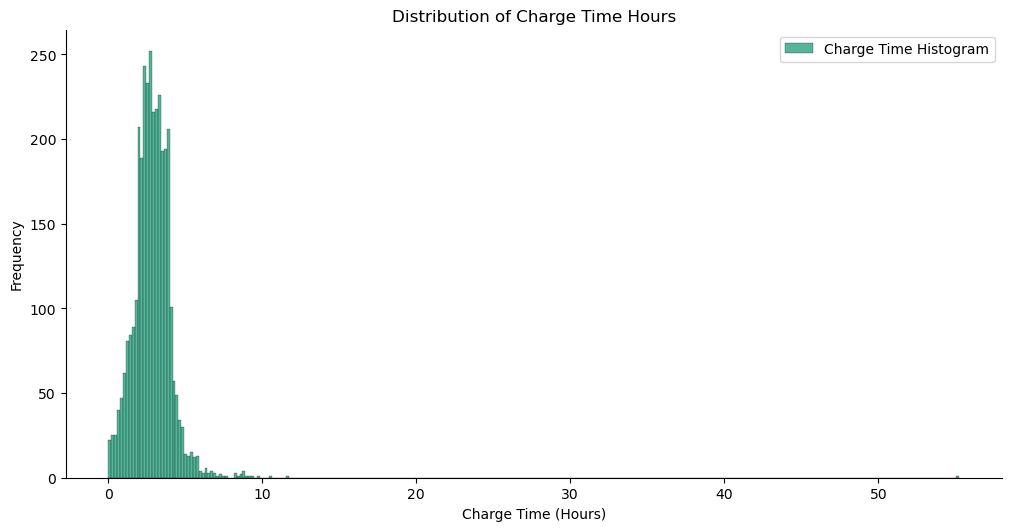

In [21]:

def _plot_charging_histogram(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    ys = series['chargeTimeHrs']

    sns.histplot(ys, label=series_name, color=palette[series_index % len(palette)])  # Adjust bins as needed

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_charging_histogram(df_non_zero, 'Charge Time Histogram')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Charge Time (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Charge Time Hours')
plt.legend()
plt.show()


Based on the last section and this section, we can see the charge time is normally less than 10 hrs, with only one above 50 hrs.

In [22]:
df_non_zero[df_non_zero['chargeTimeHrs']>50]

,kwhTotal,dollars,distance,created,ended,chargeTimeHrs,userId,stationId,locationId
173,4.1,0.83,NaN,2015-01-26 18:09:47,2015-01-29 01:24:04,55.238056,65023200,863084,751082


In [23]:
df_non_zero.drop(df_non_zero[df_non_zero['chargeTimeHrs'] > 50].index)

,kwhTotal,dollars,distance,created,ended,chargeTimeHrs,userId,stationId,locationId
343,5.61,0.00,20.695727,2014-11-18 15:01:17,2014-11-18 18:26:04,3.413056,30828105,632920,461655
0,7.78,0.00,NaN,2014-11-18 15:40:26,2014-11-18 17:11:04,1.510556,35897499,582873,461655
1,9.74,0.00,NaN,2014-11-19 17:40:26,2014-11-19 19:51:04,2.177222,35897499,549414,461655
344,9.03,0.00,20.695727,2014-11-19 19:01:41,2014-11-19 22:10:06,3.140278,30828105,569889,461655
345,6.95,0.00,20.695727,2014-11-20 19:20:45,2014-11-20 21:48:04,2.455278,30828105,612116,461655
2,6.76,0.58,NaN,2014-11-21 12:05:46,2014-11-21 16:46:04,4.671667,35897499,129465,461655
346,7.38,0.00,20.695727,2014-11-21 19:02:04,2014-11-21 21:31:03,2.483056,30828105,549414,461655
347,6.69,0.00,20.695727,2014-11-24 17:16:19,2014-11-24 19:31:04,2.245833,30828105,129465,461655
348,6.96,0.67,20.695727,2014-11-25 16:57:46,2014-11-25 21:42:04,4.738333,30828105,129465,461655
349,6.86,0.00,20.695727,2014-12-01 18:05:30,2014-12-01 21:40:19,3.580278,30828105,129465,461655


Given the query of the session, the `chargeTimeHrs` of which is above 50 hrs, the `kwhTotal` is 4.1 and paid for 0.83. It might be an technical issue, hence we drop this record.

### **1.4 What is the total distance consumed**

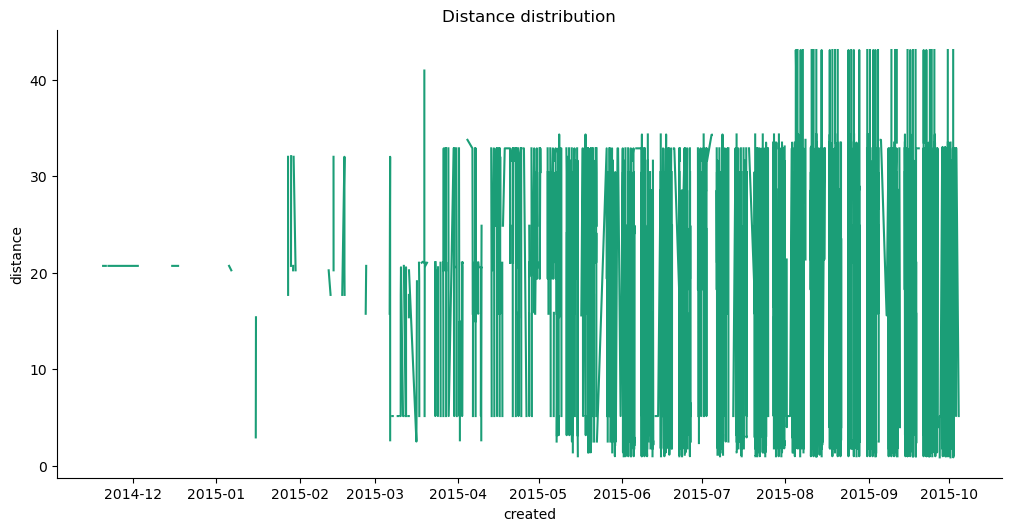

In [24]:
def _plot_distance(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['created']
  ys = series['distance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_distance(df_non_zero, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('created')
plt.title('Distance distribution')
_ = plt.ylabel('distance')

Since we can see from the statistical description and the plot here, distance missed many values. We are interested in the relations/reasons of the missing values. Here we are going to explore if it is MCAR (missing complete at random) or not.

### 1.4.1 Missing values in distance

In order to detect an MCAR pattern, we can use statistical tests. One famous statistical test for this purpose is the 𝜒2 test. The 𝜒2 could be used to test goodness of fit, homogenity test and independence test. The latter will be used in this case to figure out if the missigness of data in the `distance` column is dependent (or not) on the other variables (columns).

The test starts by stating a first hypothesis called (the null hypothesis) and calculates a measure of closness between the observed data and the expected data (in the case where the null hypothesis is satisfied).

The null hypothesis in this case is the following:

𝐻0 : There is no association between the missingness in the distance column and the other columns. The critical  𝑝 -value associated to this test is equal to 0.05.

Let us first define the columns "Distance_missing" that equals to True if `distance` is missing and False otherwise.




In [25]:
# Initialize the Dice columns
df_non_zero["distance_missing"] = df_non_zero["distance"]
# The column is false
df_non_zero["distance_missing"] = False
# Replace where Height_missing with True where Height is missing
df_non_zero.loc[df_non_zero[df_non_zero['distance'].isnull()].index, "distance_missing"] = True
# df_sorted

Since the charging time are not longer than a day, which means the `ended` date should be the same as `created` date. Here we transfer the format of `created` to YYYY-MM-DD and drop the `ended`.

In [26]:
def transfer_date(date_str):
    try:
        # Split the date string and check the year
        timestamp_str = str(date_str)
        date_str, time_str = timestamp_str.split(' ')

        return date_str
    except Exception as e:
        # Handle exceptions if date_str is not a proper date string
        return np.nan
df_non_zero['created_date'] = df_non_zero['created'].apply(transfer_date)
# df_sorted['created_date'] = pd.to_datetime(df_sorted['created_date'], errors='coerce')


#### **Assess the relationship between `created_date` and `distance_missing`**
The first step is to detect if the missingness in the variable is relate to the other variables. The Chi2 contngency test from the scipy library will be used. This requires tge establishement of the contengeny table.


---







In [27]:
True_missing = df_non_zero[df_non_zero["distance_missing"]==True].groupby("created_date")["distance_missing"].count()
True_missing[:5]

created_date
2014-11-18    1
2014-11-19    1
2014-11-21    1
2014-12-03    1
2014-12-11    1
Name: distance_missing, dtype: int64

In [28]:
False_missing = df_non_zero[df_non_zero["distance_missing"]==False].groupby("created_date")["distance_missing"].count()


In [29]:
merged_missing = pd.merge(True_missing, False_missing, on='created_date', how='inner')  # 'inner' join keeps only the common dates


This table will be fed to the Chi2 contngency test from the scipy library. We expect that the degree of freedom will be 1 ((nrows-1) * (nclos-1)). This is also an information the scipy function returns.

In [30]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(merged_missing.values)

The associated  𝑝
 -value to this observation is equal to:

In [31]:
print("The p-value is esqual to {}".format(p))


The p-value is esqual to 0.5417033153419702


Since the  𝑝-value is greater that 5%, not significant result, we fail to reject null hypothesis (H0) and the two variables are indepedent.

 As a conclusion, the missingness in the `distance` does not dependent on the date variable. Next, we should perform the same analysis for the other variables: weight and salary. This could be done in the same manner with a signle modification. Since the  𝑐ℎ𝑖2
  test could not be performed between a continous and a categorical variable, the continous variables must be converted into categories by performing some binning techniques. So next step, we will explore the relationship of the missingness in the `distance` with other features.


#### **Assess the relationship between `distance_missing` and other features**


In [32]:
df_non_zero.columns

Index(['kwhTotal', 'dollars', 'distance', 'created', 'ended', 'chargeTimeHrs',
       'userId', 'stationId', 'locationId', 'distance_missing',
       'created_date'],
      dtype='object')

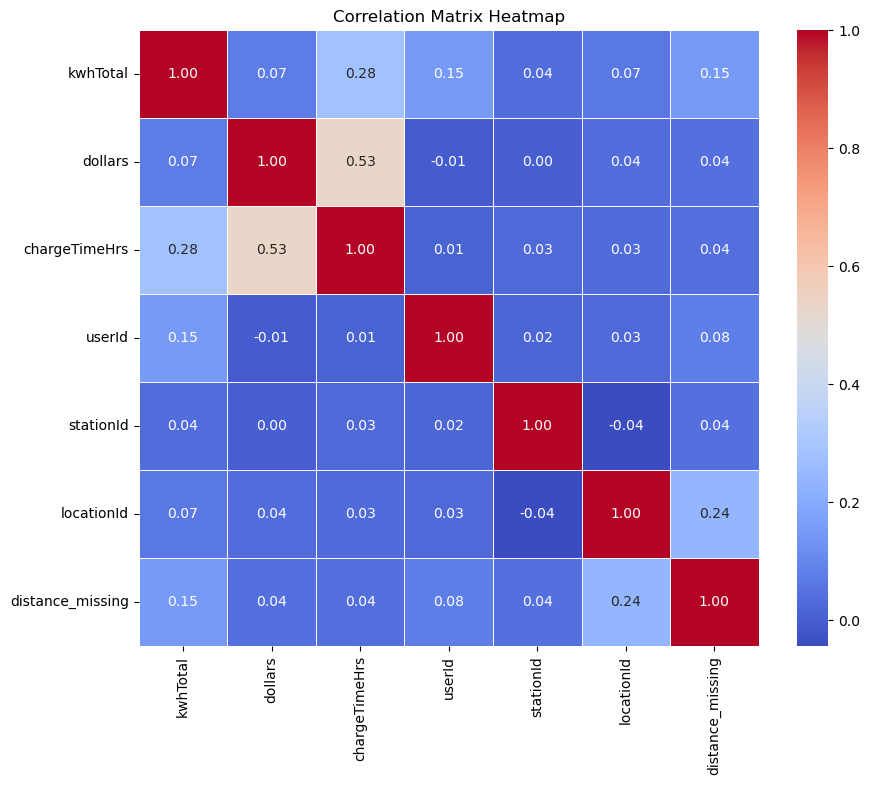

In [33]:
from scipy.stats import pearsonr


# Correlation - Pearson correlation coefficient
# Pearson correlation coefficient measures the linear relationship between two continuous variables. The output is a correlation matrix, where the values range from -1 to 1:[link text](https://)

# 1: Perfect positive linear relationship.

# -1: Perfect negative linear relationship.

# 0: No linear relationship.

df_non_zero['distance_missing'] = df_non_zero['distance_missing'].apply(lambda x: 1 if x else 0)

matrix = df_non_zero[['kwhTotal', 'dollars', 'chargeTimeHrs',
       'userId', 'stationId', 'locationId', 'distance_missing']]
correlation_matrix = df_non_zero[['kwhTotal', 'dollars', 'chargeTimeHrs',
       'userId', 'stationId', 'locationId', 'distance_missing']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [34]:

# Calculate p-values for each pair of features
p_values = pd.DataFrame(index=matrix.columns, columns=matrix.columns)

for col1 in matrix.columns:
    for col2 in matrix.columns:
        if col1 != col2:
            _, p_value = pearsonr(matrix[col1], matrix[col2])
            p_values.loc[col1, col2] = p_value
# print(p_values)

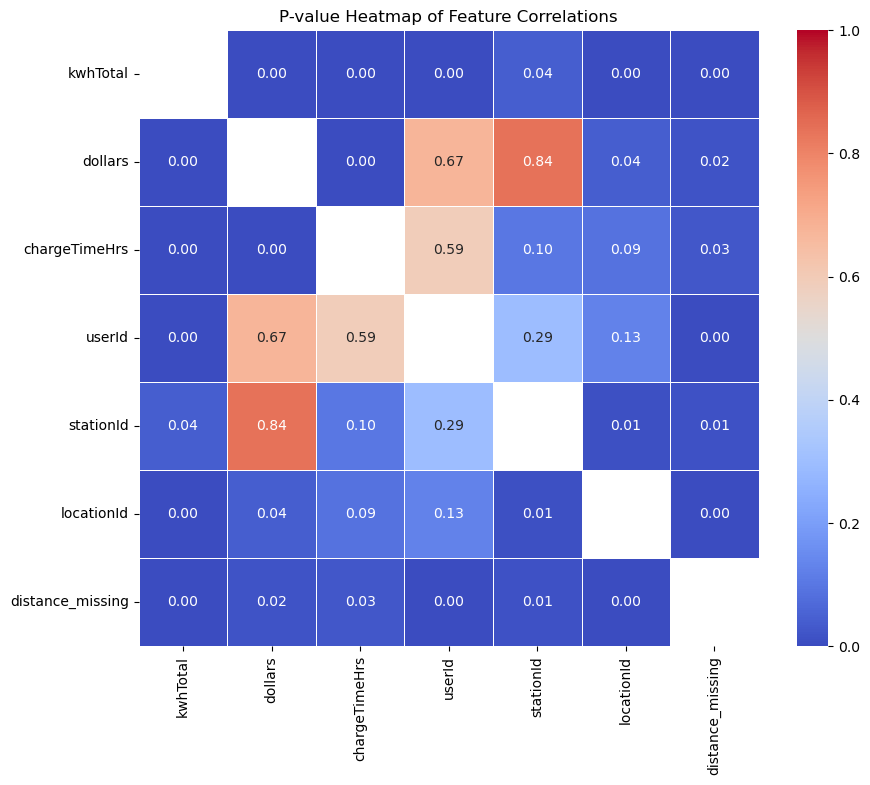

In [35]:
p_values = p_values.apply(pd.to_numeric)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=0, vmax=1)
plt.title('P-value Heatmap of Feature Correlations')
plt.show()


### Key Points:

<!-- 1. **Significant Relationships of **:
   - **kwhTotal**:
     - Very significant relationships with `dollars`, `chargeTimeHrs`, `locationId`, and `distance_missing` (p-value < 0.05).
   - **dollars**:
     - Significant with `kwhTotal` and `distance_missing` (p-value < 0.05), but not with other features.
   - **chargeTimeHrs**:
     - Significant with `locationId` (p-value < 0.05), but not with other features.
   - **userId**:
     - Very significant with `distance_missing` (p-value < 0.05), indicating a strong relationship.
   - **stationId**:
     - Significant with `kwhTotal` and `locationId` (p-value < 0.05), but not with other features.
   - **locationId**:
     - Very significant with `kwhTotal` and `chargeTimeHrs` (p-value < 0.05).
   **distance_missing**:
     - Very significant with `kwhTotal`, `dollars`, and `userId` (p-value < 0.05).

2. **Non-Significant Relationships**:
   - Features such as `userId` and `stationId` have non-significant relationships with several other features. For example, `userId` has a non-significant relationship with `dollars`, `chargeTimeHrs`, and `stationId`.

3.-->
 **High Significance for `distance_missing`**:
   - The `distance_missing` feature is significant with multiple features, especially with `userId`, `kwhTotal`, and `dollars`. This suggests that the presence of missing `distance` data is strongly related to these features.

### Interpretation:
- **MNAR or MAR**: The significant p-values between `distance_missing` and other features, particularly `userId`, could suggest that missing data might not be completely at random. To confirm if the missingness is MAR or MNAR, you would need to further analyze if the missingness is related to other observed or unobserved variables.
<!--
### Recommendations:
1. **Explore Relationships**: Deepen the analysis of significant relationships to understand underlying patterns.
2. **Consider Missing Data Mechanism**: Use additional statistical tests or visualization to investigate if missing data is MAR or MNAR.
3. **Feature Engineering**: Include significant features in predictive models or imputation methods to handle missing data effectively. -->


Since `kwhTotal` reflects less variations, we consider `userId` or `locationId` for the `distance_missing`.

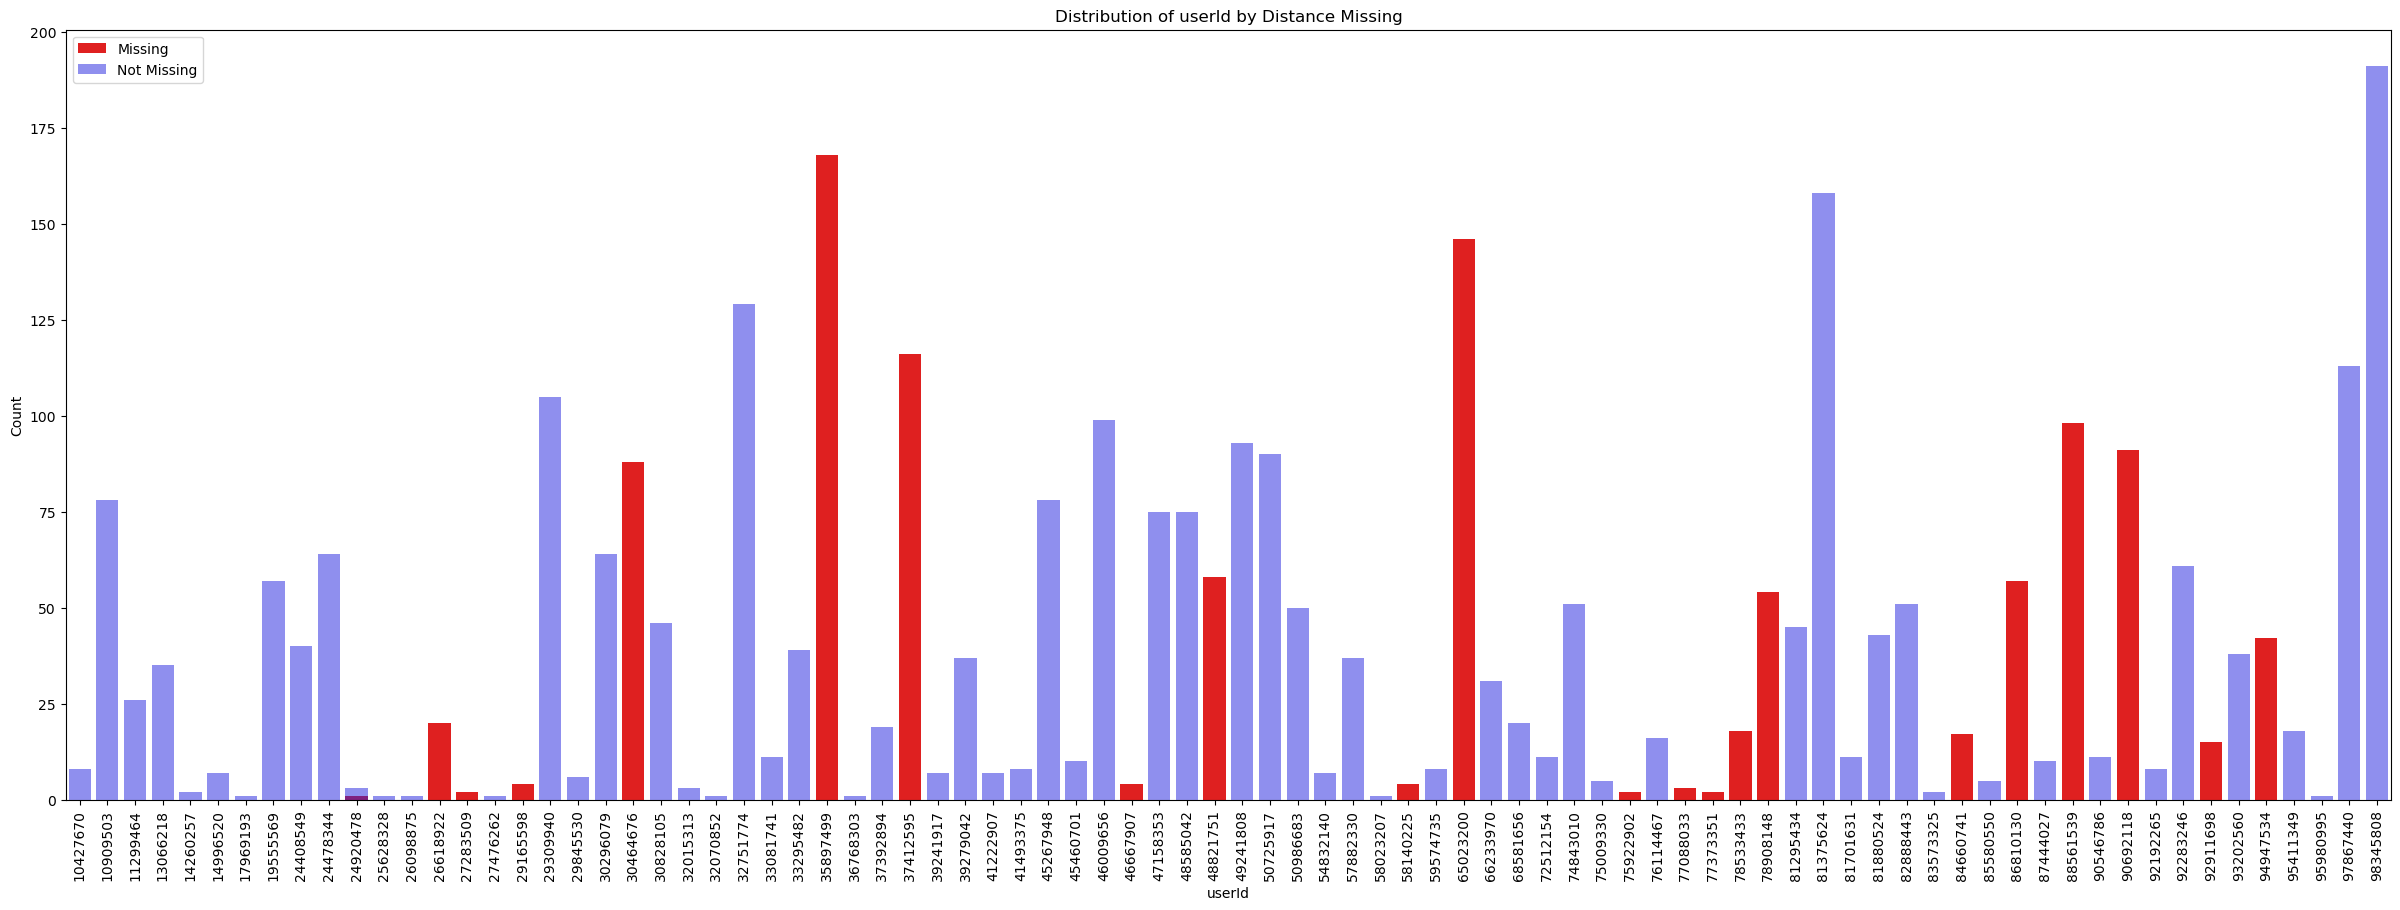

In [36]:


# Group by userId and count occurrences for each condition
missing_counts = df_non_zero[df_non_zero['distance_missing'] == 1]['userId'].value_counts()
not_missing_counts = df_non_zero[df_non_zero['distance_missing'] == 0]['userId'].value_counts()

# Combine all userIds to ensure consistent x-axis
all_user_ids = sorted(set(missing_counts.index).union(set(not_missing_counts.index)))

# Create DataFrames for plotting
missing_df = pd.DataFrame({
    'userId': all_user_ids,
    'Count': missing_counts.reindex(all_user_ids, fill_value=0).values,
    'Distance Missing': 'Missing'
})

not_missing_df = pd.DataFrame({
    'userId': all_user_ids,
    'Count': not_missing_counts.reindex(all_user_ids, fill_value=0).values,
    'Distance Missing': 'Not Missing'
})

# Combine the two DataFrames
counts_df = pd.concat([missing_df, not_missing_df])

# Plot
plt.figure(figsize=(30, 10))

# Plot for Missing data
sns.barplot(x='userId', y='Count', data=missing_df, color='red', label='Missing')

# Plot for Not Missing data
sns.barplot(x='userId', y='Count', data=not_missing_df, color='blue', label='Not Missing', alpha=0.5)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of userId by Distance Missing')
plt.xlabel('userId')
plt.ylabel('Count')
plt.legend()
plt.show()




In [37]:
all_user_ids = missing_counts.index.union(not_missing_counts.index)
missing_counts = missing_counts.reindex(all_user_ids, fill_value=0)
not_missing_counts = not_missing_counts.reindex(all_user_ids, fill_value=0)

# Calculate the difference
difference = missing_counts - not_missing_counts

# Find userIds where the difference matches the missing_counts
result_user_ids = difference[difference == missing_counts].index

# Filter the DataFrame
result_df = df_non_zero[df_non_zero['userId'].isin(result_user_ids)]

print("UserIds where only with the missing values in distance:")
print(result_user_ids)


UserIds where only with the missing values in distance:
Index([26618922, 27283509, 29165598, 30464676, 35897499, 37412595, 46667907,
       48821751, 58140225, 65023200, 75922902, 77088033, 77373351, 78533433,
       78908148, 84660741, 86810130, 88561539, 90692118, 92911698, 94947534],
      dtype='int64', name='userId')


In [38]:
df_filtered = df_non_zero[~df_non_zero['userId'].isin(result_user_ids)]


In [39]:
df_filtered[df_filtered['distance_missing'] == 1]['distance_missing'].value_counts()

distance_missing
1    1
Name: count, dtype: int64

After we filtered the missing values of distance with the targets userId, only one record missed the distance value. Hence we fill it with mean value of distance due to the information reflected by `Distance distribution`.

In [40]:
df_filtered.distance.fillna(df_filtered.distance.mean(), inplace=True)


/var/folders/0m/hd5nyhdj19b3dcxl72fwby3c0000gn/T/ipykernel_31806/325559159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.distance.fillna(df_filtered.distance.mean(), inplace=True)


### **1.5 What is the Facility Type**


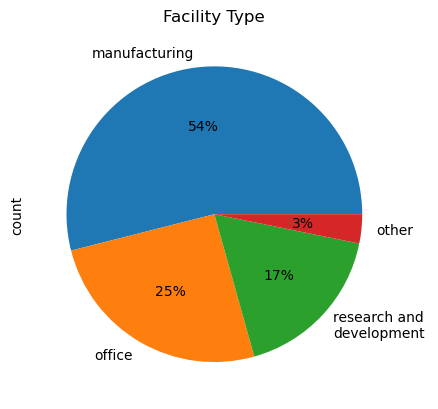

In [41]:
facility_types = {"manufacturing":1, "office":2, "research and \ndevelopment":3, "other":4}
df.facilityType.value_counts().plot.pie(y='facilityType', labels = facility_types, autopct='%.0f%%', title='Facility Type')
plt.show()

### **1.6 Charging distribution in the week**

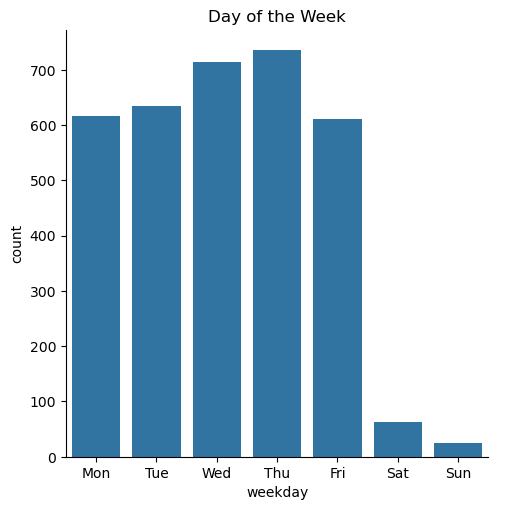

In [42]:
sns.catplot(df, x="weekday", kind="count", order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).set(title="Day of the Week")
plt.show()

### **Summary**:
Based on all the questions we discovered exploration, we can dive into a quesiton that is interesting with further discovery - buid a model to


1.   **forecast the energy usage (Kwh) on each day.**
2.   **the energy usage (Kwh) within the period of each day**



